In [40]:
!pip install pandas
!pip install numpy
!pip install seaborn
!pip install matplotlib

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [9]:
df = pd.read_csv('Customer Churn.csv')
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


#replacing blanks with 0  as tenure is 0 and no total charges are recorded
also converted data type from object to float as well

In [12]:
df["TotalCharges"] = df['TotalCharges'].replace(" ","0")
df["TotalCharges"] = df['TotalCharges'].astype("float")

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


# checking if is any null value or not 

In [17]:
df.isnull().sum().sum()

0

In [18]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,7043.000000,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692,2279.734304
std,0.368612,24.559481,30.090047,2266.794470
min,0.000000,0.000000,18.250000,0.000000
25%,0.000000,9.000000,35.500000,398.550000
50%,0.000000,29.000000,70.350000,1394.550000
75%,0.000000,55.000000,89.850000,3786.600000
max,1.000000,72.000000,118.750000,8684.800000


In [21]:
df["customerID"].duplicated().sum()

0

# converted 0 and 1 values od senior citizen to yes/no to make it easier to understand by using conv() function

In [22]:
def conv(value):
    if value == 1:
        return "yes"
    else:
        return "no"

df['SeniorCitizen'] = df["SeniorCitizen"].apply(conv)

# here we created a bar charts which shows the no of customers churned out i.e 1869 customers are churned out

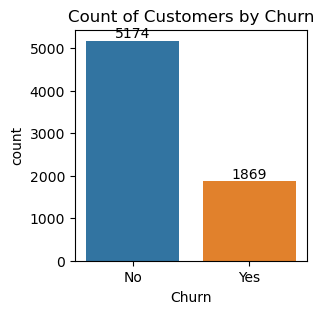

In [62]:
plt.figure(figsize = (3,3))
ax = sns.countplot(x = 'Churn', data = df)
ax.bar_label(ax.containers[0])
plt.title("Count of Customers by Churn")
plt.show()

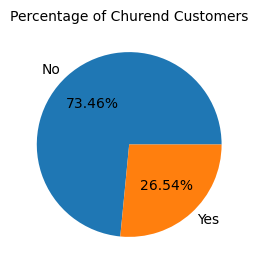

In [65]:
plt.figure(figsize = (3,3))
gb = df.groupby("Churn").agg({'Churn': "count"})
plt.pie(gb['Churn'], labels = gb.index, autopct = "%1.2f%%")
plt.title("Percentage of Churend Customers",fontsize = 10)
plt.show()


#from the given pie chart we canconclude that 26.54% of our customers have churned out.
#now let's explore the reason behind it

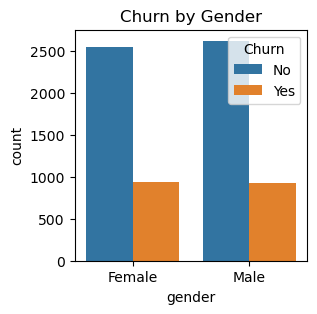

In [66]:
plt.figure(figsize = (3,3))
sns.countplot(x = "gender", data = df, hue= "Churn")
plt.title("Churn by Gender")
plt.show()

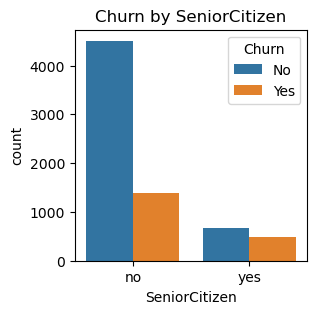

In [73]:
plt.figure(figsize = (3,3))
sns.countplot(x = "SeniorCitizen", data = df, hue= "Churn")
plt.title("Churn by SeniorCitizen")
plt.show()

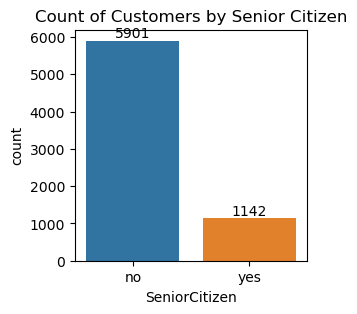

In [72]:
plt.figure(figsize = (3,3))
ax = sns.countplot(x = "SeniorCitizen", data = df)
ax.bar_label(ax.containers[0])
plt.title("Count of Customers by Senior Citizen")
plt.show()

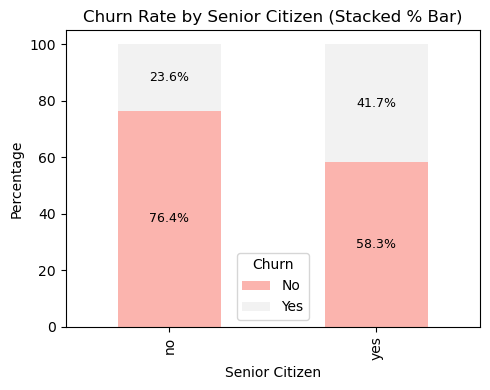

In [74]:
import pandas as pd
import matplotlib.pyplot as plt

# 1. Create a crosstab of counts
ct = pd.crosstab(df['SeniorCitizen'], df['Churn'])

# 2. Convert to percentage of total for each SeniorCitizen group
ct_percent = ct.div(ct.sum(axis=1), axis=0) * 100

# 3. Plot stacked bar chart
ax = ct_percent.plot(kind='bar', stacked=True, figsize=(5, 4), colormap="Pastel1")

# 4. Add % labels on each segment
for container in ax.containers:
    ax.bar_label(container, fmt='%.1f%%', label_type='center', fontsize=9)

plt.title("Churn Rate by Senior Citizen (Stacked % Bar)")
plt.xlabel("Senior Citizen")
plt.ylabel("Percentage")
plt.legend(title="Churn", bbox_to_anchor = (0.9,0.9)) #customized legend location
plt.tight_layout()
plt.show()


#comparative a greater percentage of people in senior citizen have churned 

C:\Users\nidhi\anaconda3\anaconda2\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


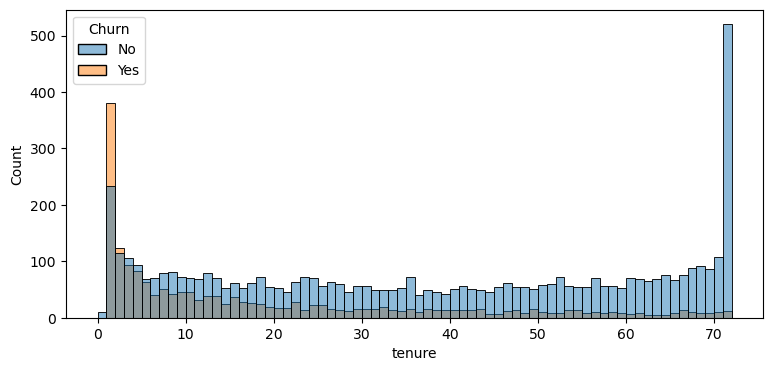

In [84]:
plt.figure(figsize=(9,4))
sns.histplot(x= "tenure", data = df, bins = 72, hue = 'Churn')
plt.show()

#people who have used our services for a long time have stayed and people who have used our services # 1 

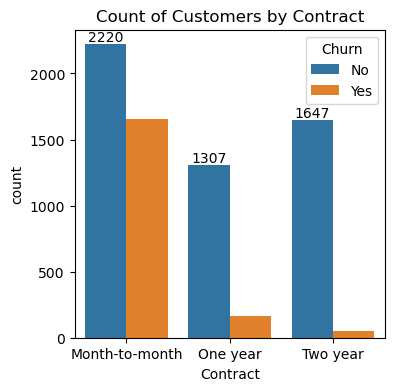

In [88]:
plt.figure(figsize = (4,4))
ax = sns.countplot(x = "Contract", data = df, hue = 'Churn')
ax.bar_label(ax.containers[0])
plt.title("Count of Customers by Contract")
plt.show()

#people who have month to month contract are likely to churn than from those who have 1 or 2 years of contract

In [90]:
df.columns.values

array(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract',
       'PaperlessBilling', 'PaymentMethod', 'MonthlyCharges',
       'TotalCharges', 'Churn'], dtype=object)

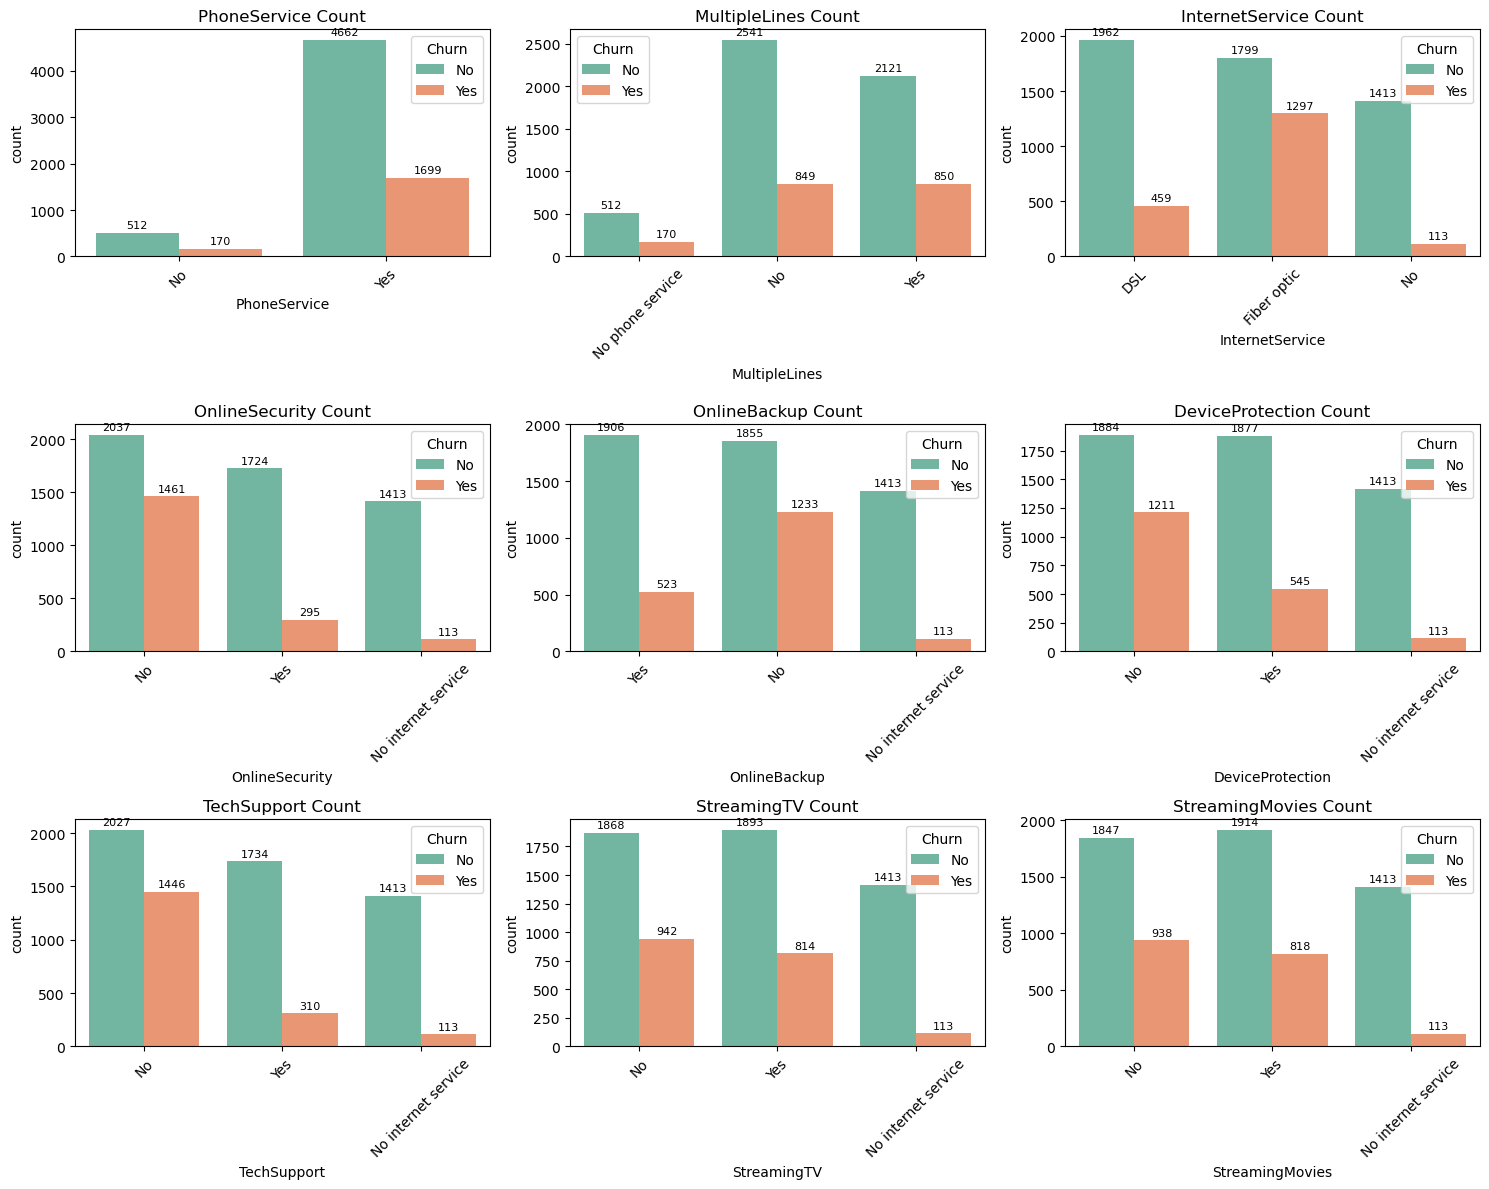

In [96]:
# List of your categorical columns
cols = ['PhoneService', 'MultipleLines', 'InternetService',
        'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
        'TechSupport', 'StreamingTV', 'StreamingMovies']

# Set number of rows and columns for subplots
n_cols = 3
n_rows = (len(cols) + n_cols - 1) // n_cols  # ensures all plots fit

# Set figure size
plt.figure(figsize=(n_cols*5, n_rows*4))

# Create subplots
for i, col in enumerate(cols, 1):
    plt.subplot(n_rows, n_cols, i)
    ax = sns.countplot(x=col, data=df, palette="Set2", hue=df['Churn'] )
    plt.title(f'{col} Count')
    plt.xticks(rotation=45)
    for container in ax.containers:
        ax.bar_label(container, fontsize=8, padding=2)

plt.tight_layout()
plt.show()


#The visualized data shows customer churn distribution across various telecom services. Churn rates are generally higher among customers who do not use additional services like OnlineSecurity, TechSupport, OnlineBackup, and DeviceProtection. Customers with fiber optic internet also show a significantly higher churn compared to those with DSL. Overall, lack of value-added services appears to correlate with increased churn.

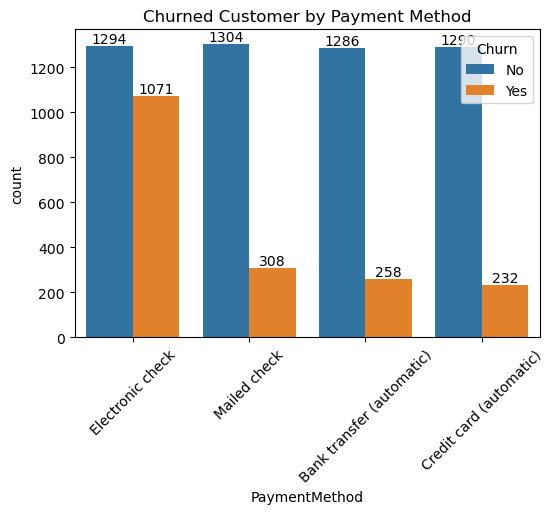

In [113]:
plt.figure(figsize = (6,4))
ax = sns.countplot(x="PaymentMethod", data = df, hue = 'Churn')
ax.bar_label(ax.containers[0])
ax.bar_label(ax.containers[1])
plt.title("Churned Customer by Payment Method")
plt.xticks(rotation = 45)
plt.show()


#customer is likely to churn when he is ousing electronic check as payment method